# Natural Language Processing Project

In this NLP project we are going to attempt to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews.

We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business (Higher stars is better). In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

## Imports
 **Import the usual suspects. :) **

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

**Reading the yelp.csv file and setting it as a dataframe called yelp.**

In [2]:
yelp = pd.read_csv('yelp.csv')

** Checking out the head, info, and describe methods on yelp.**

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**Let's create a new column called "text length" which is the number of words in the text column.**

In [34]:
yelp['text length'] = yelp['text'].apply(lambda text: len(text.split()))

In [35]:
yelp['text length'].head()

0    155
1    257
2     16
3     76
4     86
Name: text length, dtype: int64

# EDA

Let's explore the data.

**For the first visualization, we're going to use FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings.**

<Figure size 864x432 with 0 Axes>

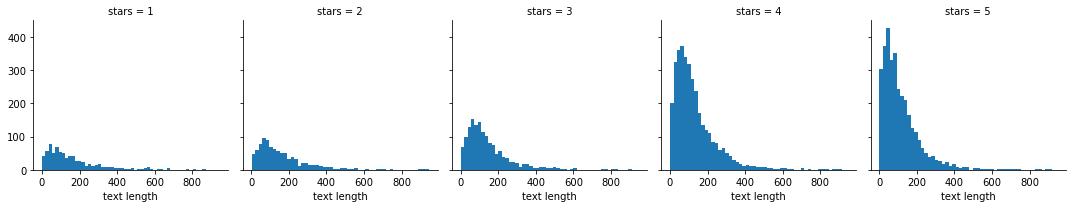

In [36]:
plt.figure(figsize=(12,6))
g = sns.FacetGrid(yelp, col='stars')
g.map(plt.hist, 'text length', bins=50)

Because the dataset has so many rows, we set bins=50. The distribution of text length seems to be the same for all the number of stars. Also, we can see that the amount of text reviews seems to be skewed a lot higher towards 4 and 5 stars.

**Let's create a boxplot of text length for each star category.**

<AxesSubplot:xlabel='stars', ylabel='text length'>

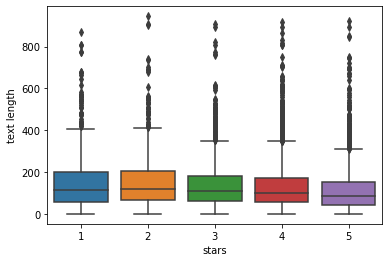

In [37]:
sns.boxplot(x='stars', y='text length', data=yelp)

It appears that 1 to 2 stars reviews have higher Text Lengths, but there's so many outliers, which is showed by these dots outside of the bar of the boxplot, that it may not be a useful feature.

**Let's go ahead and create a countplot of the number of occurrences for each type of star rating.**

<AxesSubplot:xlabel='stars', ylabel='count'>

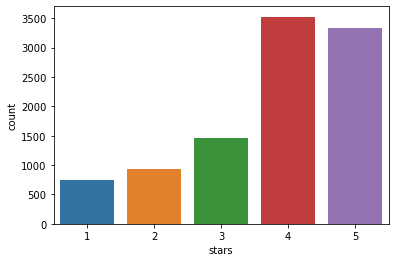

In [38]:
sns.countplot(x='stars', data=yelp)

Just like we saw in the histogram that we have highers amounts of 4 and 5 stars reviews, this is reflected in the counterplot as well.

**We're going to create a new dataframe using the groupby() method to get the mean values of the numerical columns.**

In [39]:
stars = yelp.groupby('stars').mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,153.953271
2,0.719525,1.563107,0.875944,156.435814
3,0.788501,1.306639,0.694730,140.714579
4,0.954623,1.395916,0.670448,131.174135
5,0.944261,1.381780,0.608631,114.463590


**Now let's use the corr() method on that groupby dataframe to produce a new dataframe with the correlation between the new values.**

In [40]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.865362
useful,-0.743329,1.000000,0.894506,0.697506
funny,-0.944939,0.894506,1.000000,0.847204
text length,-0.865362,0.697506,0.847204,1.000000


**Then we can use seaborn to create a heatmap based off that .corr() dataframe.**

<AxesSubplot:>

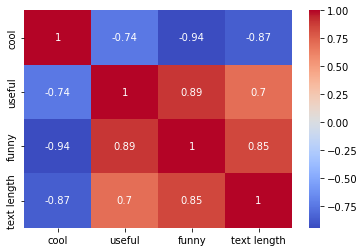

In [41]:
sns.heatmap(stars.corr(), cmap='coolwarm', annot=True)

Looking at this, we can conclude that 'funny' value is highly correlated to the 'useful' value, as well as useful being correlated to 'text length'. Also, it looks like we have some negatiive correlation between 'cool' with 'text length' and 'useful'.

## NLP Classification Task

Let's move on to the actual task. We are going to only grab reviews that were either 1 star or 5 stars, so we can predict the two extreme values.

**For this, we have to create a dataframe that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.**

In [42]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]

**Now let's create two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class.**

In [43]:
X = yelp_class['text']
y = yelp_class['stars']

**Importing CountVectorizer and creating a CountVectorizer object.**

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

**Using the fit_transform method on the CountVectorizer object and passing in X (the 'text' column).**

In [45]:
X = cv.fit_transform(X)

## Train Test Split

Let's split our data into training and testing data.

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

## Training the Model

Time to train the model.

**We're going to import MultinomialNB and create an instance of the estimator and call it nb.**

In [20]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

**Now we fit nb using the training data.**

In [21]:
nb.fit(X_train, y_train)

MultinomialNB()

## Predictions and Evaluations

Time to see how our model did.

**We'll go ahead and use the predict() method off of nb to predict labels from X_test.**

In [22]:
predictions = nb.predict(X_test)

**Now to actually check the results, we can create a confusion matrix and classification report using these predictions and y_test.**

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

In [24]:
print(confusion_matrix(y_test, predictions))

[[159  69]
 [ 22 976]]


In [25]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



Not too bad. We're looking at around 90% accuracy precision and recall between the 1 stars and 5 stars classes.

**Great. Let's see what happens if we try to include TF-IDF to this process using a pipeline.**

# Using Text Processing

In [26]:
from sklearn.feature_extraction.text import TfidfTransformer

In [27]:
from sklearn.pipeline import Pipeline

**Now we will create a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB().**

In [28]:
pipeline = Pipeline([
    ('bow', CountVectorizer()), # strings to token integer counts
    ('tfidf', TfidfTransformer()), # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),
])

## Using the Pipeline

**Time to use the pipeline. This pipeline has all our pre-process steps in it already, meaning we'll need to re-split the original data (Remember that we overwrote X as the CountVectorized version. What we need is just the text.**

### Train Test Split

**Redoing the train test split on the yelp_class object.**

In [29]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

**Now let's fit the pipeline to the training data. We can't use the same training data as last time because that data has already been vectorized. We need to pass in just the text and labels, which we already did in the cell above.**

In [30]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

### Predictions and Evaluation

**Now let's use the pipeline to predict from the X_test and create a classification report and confusion matrix.**

In [31]:
predictions = pipeline.predict(X_test)

In [32]:
print(confusion_matrix(y_test, predictions))

[[  0 228]
 [  0 998]]


In [33]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



c:\Users\Vitor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Vitor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Vitor\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Looks like Tf-Idf actually made things worse. This is due to the special syntax of text messages. The term frequency is not as significant.
For example, maybe 5 stars are all dependent on the word 'good' whereas tfidf penalizes word that appears too frequently (if 'good' appears in every 5 star review).